In [1]:
# Import library dasar untuk clustering, evaluasi, dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

sns.set(style="whitegrid")


In [2]:
# Load dataset Seeds (3 varietas gandum: Kama=1, Rosa=2, Canadian=3)
col_names = [
    "area", "perimeter", "compactness", 
    "length_kernel", "width_kernel", 
    "asymmetry_coef", "length_kernel_groove", 
    "variety"
]

df = pd.read_csv("seeds_dataset.txt", sep="\s+", header=None)
df.columns = col_names

print("Jumlah data:", df.shape)
df.head()


Jumlah data: (210, 8)


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coef,length_kernel_groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Implementasi KMeans dengan k=3 (jumlah varietas gandum)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(df.iloc[:, :-1])

# Evaluasi KMeans: hanya Silhouette Score
silhouette_kmeans = silhouette_score(df.iloc[:, :-2], df['cluster_kmeans'])

print("=== K-Means Clustering ===")
print("Parameter: n_clusters=3, random_state=42")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")


=== K-Means Clustering ===
Parameter: n_clusters=3, random_state=42
Silhouette Score: 0.472


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


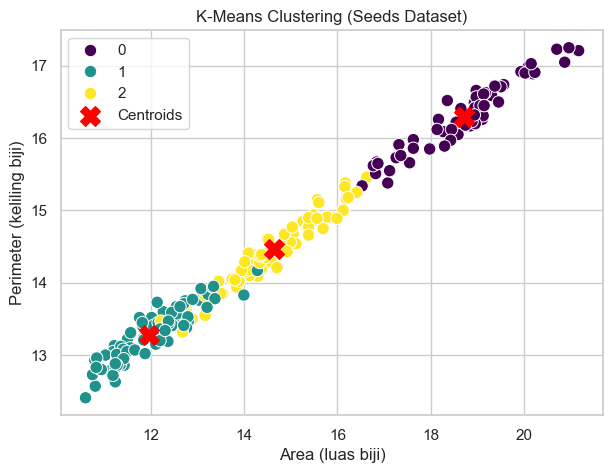

In [4]:
# Visualisasi hasil KMeans
plt.figure(figsize=(7,5))
sns.scatterplot(x="area", y="perimeter", hue="cluster_kmeans", data=df, palette="viridis", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (Seeds Dataset)")
plt.xlabel("Area (luas biji)")
plt.ylabel("Perimeter (keliling biji)")
plt.legend()
plt.show()


In [5]:
# Implementasi KMedoids dengan k=3
kmedoid = KMedoids(n_clusters=3, random_state=42)
df['cluster_kmedoids'] = kmedoid.fit_predict(df.iloc[:, :-1])

# Evaluasi KMedoids: hanya Silhouette Score
silhouette_kmedoids = silhouette_score(df.iloc[:, :-2], df['cluster_kmedoids'])

print("=== K-Medoids Clustering ===")
print("Parameter: n_clusters=3, random_state=42")
print(f"Silhouette Score: {silhouette_kmedoids:.3f}")


=== K-Medoids Clustering ===
Parameter: n_clusters=3, random_state=42
Silhouette Score: 0.492


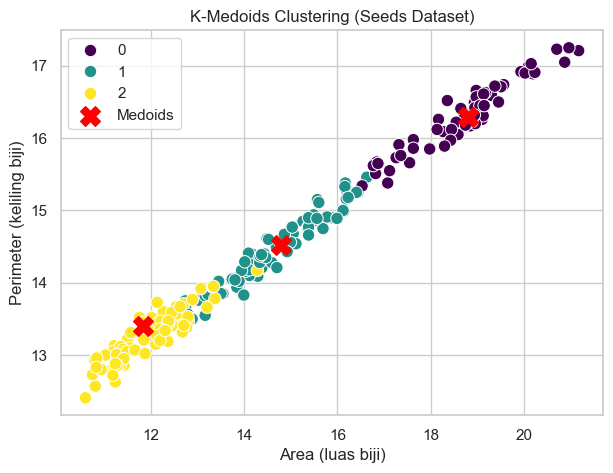

In [6]:
# Visualisasi hasil KMedoids
plt.figure(figsize=(7,5))
sns.scatterplot(x="area", y="perimeter", hue="cluster_kmedoids", data=df, palette="viridis", s=80)
plt.scatter(kmedoid.cluster_centers_[:,0], kmedoid.cluster_centers_[:,1], s=200, c='red', marker='X', label='Medoids')
plt.title("K-Medoids Clustering (Seeds Dataset)")
plt.xlabel("Area (luas biji)")
plt.ylabel("Perimeter (keliling biji)")
plt.legend()
plt.show()


In [7]:
# DBSCAN dengan parameter default
epsi = 0.9
minsam = 7
dbscan = DBSCAN(eps=epsi, min_samples=minsam)
df['cluster_dbscan'] = dbscan.fit_predict(df.iloc[:, :-1])

n_clusters_dbscan = len(set(df['cluster_dbscan'])) - (1 if -1 in df['cluster_dbscan'].values else 0)

print("=== DBSCAN Clustering ===")
print(f"Parameter: eps={epsi}, min_samples={minsam}")
print(f"Jumlah cluster terbentuk: {n_clusters_dbscan}")

if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(df.iloc[:, :-1], df['cluster_dbscan'])
    dbi_dbscan = davies_bouldin_score(df.iloc[:, :-1], df['cluster_dbscan'])
    print(f"Silhouette Score: {silhouette_dbscan:.3f}")
    print(f"Davies-Bouldin Index: {dbi_dbscan:.3f}")
else:
    silhouette_dbscan, dbi_dbscan = None, None
    print("Hanya terbentuk 1 cluster, evaluasi tidak bisa dihitung.")

=== DBSCAN Clustering ===
Parameter: eps=0.9, min_samples=7
Jumlah cluster terbentuk: 3
Silhouette Score: 0.358
Davies-Bouldin Index: 1.712


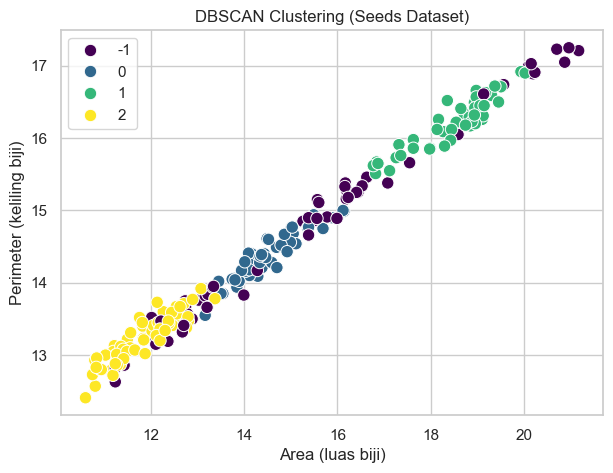

In [8]:
# Visualisasi hasil DBSCAN
plt.figure(figsize=(7,5))
sns.scatterplot(x="area", y="perimeter", hue="cluster_dbscan", data=df, palette="viridis", s=80)
plt.title("DBSCAN Clustering (Seeds Dataset)")
plt.xlabel("Area (luas biji)")
plt.ylabel("Perimeter (keliling biji)")
plt.legend()
plt.show()


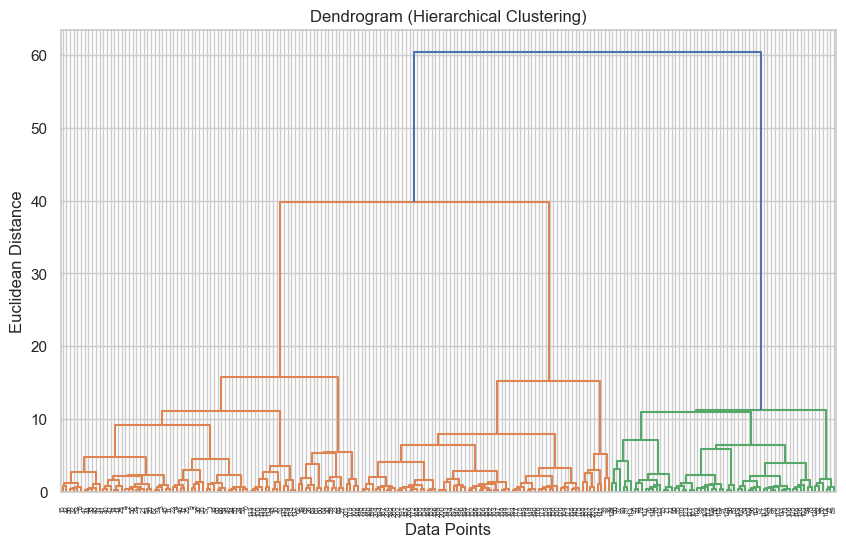

=== Hierarchical Clustering ===
Parameter: n_clusters=3, linkage='ward', metric='euclidean'
Cophenetic Correlation Coefficient: 0.813
Silhouette Score: 0.525


In [9]:
# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
df['cluster_hier'] = agg_cluster.fit_predict(df.iloc[:, :-1])

# Dendrogram
linked = linkage(df.iloc[:, :-1], method="ward")
plt.figure(figsize=(10,6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Evaluasi Hierarchical
coph_corr, _ = cophenet(linked, pdist(df.iloc[:, :-1]))
silhouette_hier = silhouette_score(df.iloc[:, :-2], df['cluster_hier'])

print("=== Hierarchical Clustering ===")
print("Parameter: n_clusters=3, linkage='ward', metric='euclidean'")
print(f"Cophenetic Correlation Coefficient: {coph_corr:.3f}")
print(f"Silhouette Score: {silhouette_hier:.3f}")


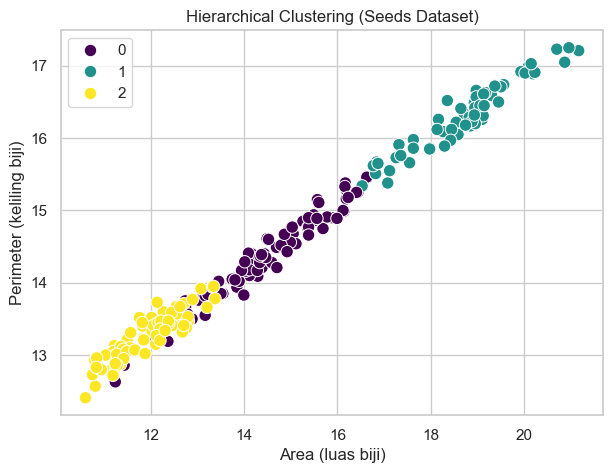

In [10]:
# Visualisasi hasil Hierarchical Clustering
plt.figure(figsize=(7,5))
sns.scatterplot(x="area", y="perimeter", hue="cluster_hier", data=df, palette="viridis", s=80)
plt.title("Hierarchical Clustering (Seeds Dataset)")
plt.xlabel("Area (luas biji)")
plt.ylabel("Perimeter (keliling biji)")
plt.legend()
plt.show()


In [11]:
print("=== Ringkasan Hasil Evaluasi ===")

summary = pd.DataFrame({
    "Silhouette Score": [
        silhouette_kmeans, silhouette_kmedoids, silhouette_dbscan, silhouette_hier
    ],
    "DBI / Cophenetic": [
        None, None, dbi_dbscan, coph_corr
    ]
}, index=["KMeans", "KMedoids", "DBSCAN", "Hierarchical"])

print(summary, "\n")

print("=== Analisis Komprehensif Berdasarkan Data ===")

# Cari algoritma dengan silhouette tertinggi
valid_sil = summary["Silhouette Score"].dropna()
best_sil_algo = valid_sil.idxmax()
best_sil_value = valid_sil.max()

print(f"- Algoritma dengan Silhouette Score tertinggi: {best_sil_algo} ({best_sil_value:.3f})")

# DBSCAN
if not pd.isna(summary.loc["DBSCAN", "Silhouette Score"]):
    print(f"- DBSCAN juga dievaluasi dengan Davies-Bouldin Index = {dbi_dbscan:.3f}")
else:
    print("- DBSCAN gagal membentuk cluster yang valid sehingga tidak dapat dievaluasi.")

# Hierarchical
print(f"- Hierarchical memiliki Cophenetic Correlation Coefficient = {coph_corr:.3f}, "
      "yang menunjukkan seberapa baik dendrogram merepresentasikan jarak antar data.")

print("\n=== Kesimpulan ===")
print(f"➡️ Berdasarkan evaluasi, algoritma paling cocok adalah {best_sil_algo}, "
      "karena menghasilkan pemisahan cluster paling baik sesuai struktur dataset Seeds.")

print("\nCatatan visualisasi:")
print("- Sumbu X = Area (luas biji gandum).")
print("- Sumbu Y = Perimeter (keliling biji gandum).")
print("  Artinya, visualisasi scatter plot memperlihatkan pengelompokan varietas gandum "
      "berdasarkan ukuran luas dan keliling bijinya. Kedua fitur ini paling mudah divisualisasikan "
      "untuk menunjukkan perbedaan antar varietas.")


=== Ringkasan Hasil Evaluasi ===
              Silhouette Score  DBI / Cophenetic
KMeans                0.471934               NaN
KMedoids              0.492416               NaN
DBSCAN                0.358051          1.712182
Hierarchical          0.525171          0.813411 

=== Analisis Komprehensif Berdasarkan Data ===
- Algoritma dengan Silhouette Score tertinggi: Hierarchical (0.525)
- DBSCAN juga dievaluasi dengan Davies-Bouldin Index = 1.712
- Hierarchical memiliki Cophenetic Correlation Coefficient = 0.813, yang menunjukkan seberapa baik dendrogram merepresentasikan jarak antar data.

=== Kesimpulan ===
➡️ Berdasarkan evaluasi, algoritma paling cocok adalah Hierarchical, karena menghasilkan pemisahan cluster paling baik sesuai struktur dataset Seeds.

Catatan visualisasi:
- Sumbu X = Area (luas biji gandum).
- Sumbu Y = Perimeter (keliling biji gandum).
  Artinya, visualisasi scatter plot memperlihatkan pengelompokan varietas gandum berdasarkan ukuran luas dan keliling bijin